In [169]:
# Importing some necessary libraries.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
tqdm.pandas()

# For getting the output of all the commands in the cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
path = "C:\\Users\\pushkar\\Dell_Inspiron_works\\Keith_Gali_Working_With_Real_World"
os.chdir(path)
print(os.getcwd())

C:\Users\pushkar\Dell_Inspiron_works\Keith_Gali_Working_With_Real_World


In [3]:
from glob import glob

In [4]:
files = glob('./Sales_Data/*.csv')
files

['./Sales_Data\\Sales_April_2019.csv',
 './Sales_Data\\Sales_August_2019.csv',
 './Sales_Data\\Sales_December_2019.csv',
 './Sales_Data\\Sales_February_2019.csv',
 './Sales_Data\\Sales_January_2019.csv',
 './Sales_Data\\Sales_July_2019.csv',
 './Sales_Data\\Sales_June_2019.csv',
 './Sales_Data\\Sales_March_2019.csv',
 './Sales_Data\\Sales_May_2019.csv',
 './Sales_Data\\Sales_November_2019.csv',
 './Sales_Data\\Sales_October_2019.csv',
 './Sales_Data\\Sales_September_2019.csv']

**Now these are all the data in our data files that we want to concatenate into a single files as our master repository** 

In [5]:
#Let's sort the data
files.sort()
files

['./Sales_Data\\Sales_April_2019.csv',
 './Sales_Data\\Sales_August_2019.csv',
 './Sales_Data\\Sales_December_2019.csv',
 './Sales_Data\\Sales_February_2019.csv',
 './Sales_Data\\Sales_January_2019.csv',
 './Sales_Data\\Sales_July_2019.csv',
 './Sales_Data\\Sales_June_2019.csv',
 './Sales_Data\\Sales_March_2019.csv',
 './Sales_Data\\Sales_May_2019.csv',
 './Sales_Data\\Sales_November_2019.csv',
 './Sales_Data\\Sales_October_2019.csv',
 './Sales_Data\\Sales_September_2019.csv']

*Sorting ain't useful here*

In [6]:
data = pd.concat( (pd.read_csv(file) for file in files), ignore_index=True)

**Since our data is now concatenated, Let's have a look at how our data look**

In [7]:
data.shape
data.info()

(186850, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
# Let's check Null values in our dataframe
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

*We do have some null values here which we don't need in our analysis here, so we'll drop them*

In [9]:
# Let's have some basic statistical idea about our data
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


###### Another Way

**In case you don't want to use glob Library, here is an another way**

In [10]:
%%time
files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])
    
all_month_data.to_csv('complete_data.csv', index = False)    

Wall time: 2.17 s


## Some Data Preprocessing

### Add the month column here

In [3]:
df = pd.read_csv('complete_data.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Method-1
df['Order Date'].str[0:2]
df['month'] = df['Order Date'].str[0:2]
df.sample(2)

0          04
1         NaN
2          04
3          04
4          04
         ... 
373695     09
373696     09
373697     09
373698     09
373699     09
Name: Order Date, Length: 373700, dtype: object

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
8310,184496,Wired Headphones,1,11.99,04/08/19 17:51,"598 Center St, Los Angeles, CA 90001",04
311000,197572,AA Batteries (4-pack),3,3.84,05/14/19 23:13,"769 6th St, New York City, NY 10001",05


In [6]:
df['month']= df['month'].astype('int32')

ValueError: cannot convert float NaN to integer

___
### Error Analysis

In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

**ValueError: cannot convert float NaN to integer**

*What does 'cannot convert float NaN to integer' means here?*

Ok, So what happened here is our month column is in object datatype, and we are trying to convert it into integer type
but there are NaN values in our month column which is throwing the Error.
___

#### Cleaning the data

In [8]:
nan_df = df[df.isna().all(axis=1)] 
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*They are there, So we need to drop them all and try it again*

In [9]:
df.dropna(how='all',inplace = True)
df.sample(n=4, random_state =0)
df.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
205674,237097,AAA Batteries (4-pack),3,2.99,08/24/19 17:05,"838 Cedar St, Boston, MA 02215",08
274766,233096,Flatscreen TV,1,300,07/01/19 22:49,"965 Center St, San Francisco, CA 94016",07
15452,191297,Lightning Charging Cable,1,14.95,04/29/19 20:24,"595 Dogwood St, New York City, NY 10001",04
162438,266671,Flatscreen TV,1,300,10/02/19 09:13,"375 5th St, Boston, MA 02215",10


(372610, 7)

___
**Ok, So now we've dropped the NaN values, let's hope we Manage to convert the month column into our desired type.**

In [10]:
df['month'] = df['month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

**Another Error, But good news is that we've got a new error here**

*ValueError: invalid literal for int() with base 10: 'Or'*
So, our engine was expecting integer values(1,2,3,4,5...) but it found 'or' and it's unable to convert it into integer type.
___

**There are some places in month column where month is "Or". Let's check that**

In [11]:
# First Way
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


**Wuh!! We've got 710 observations where Month column is 'or' and the reason why it happened because we've taken the month's
data from 'Quantity Ordered' column where there are 710 cases filled with it's base name**


In [12]:
# We could have checked it mulitiple other ways
df.month.unique()
df[df['month'] == "Or"]

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [13]:
# Let's Delete all the 'or' from our dataframe
df = df[df['month'] != 'Or']
df.shape

(371900, 7)

## Ok, let's try our luck again

In [14]:
df['month'] = df['month'].astype(int)

In [15]:
df.month.dtypes

dtype('int32')

**Finally we get it done here!**

___
##### Here are some other methods to solve this problem...

In [ ]:
# METHOD-2(We could have slice the data)
df['Order Date'].str.slice(0,2)
df['month'] = df['Order Date'].str.slice(0,2)

*But even in this case we'll encounter the same issues again.* **So, I won't recommend you to apply the first two methods,
Method 3 is the best one that i personally use in my daily analysis at work** 


In [16]:
# Let's drop the month column that we've got from the first analysis
df.drop(columns = 'month', inplace = True)

#### Method_3: Using to_datetime() to convert the 'Order Date' column into datetime format

In [17]:
df['Order Date']= pd.to_datetime(df['Order Date'])

In [18]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [19]:
# Now create a new column 'Month' here
df['Month']= df['Order Date'].dt.month.apply(lambda x: x)

In [20]:
# Lets look at our data now
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### What was the best month for sales? How much was earned that month

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [22]:
# Now let's just check the NaN values in our DataFrame for confirmation sake.
nan_df = df[df.isna().all(axis=1)] 
len(nan_df)

0

In [23]:
# Let's look at our columns
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

##### So, we're good to go..

In [24]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

####  Creating a Sales Column

In [25]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head

TypeError: can't multiply sequence by non-int of type 'str'

*Now, we are getting the following error:*  **TypeError: can't multiply sequence by non-int of type 'str'**

So, Here we're trying to calculate mathematical operation on string data types that's why **TypeError**

In [26]:
# Let's check the dtypes again
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

##### Again, we could convert these two columns(**Quantity Ordered**, **Price Each**) to numeric datatype in a mulitple way

In [27]:
# First way
chk_type = pd.to_numeric(df['Quantity Ordered'])
chk_type.dtypes

dtype('int64')

In [41]:
# Second Way
df['Quantity Ordered'].astype('int64').dtypes

dtype('int64')

**Finally Let's convert these two column values into int datatype**

In [28]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=  pd.to_numeric(df['Price Each'])

In [29]:
# Let's check the datatypes now
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

**There is one advantage to use to_numeric() fuction, it auomatically converts the string into desired type, like here it has converted the "Price Each" Column to float64 and Quantity ordered to int64(integer) datatypes.**

In [30]:
# Let's Create a Sales column which would carry the to price paid on each transaction
df['Sales'] = df['Price Each'] * df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


___
*Now since we got the sales column, let's get back to our question to find the best month for sales and the amount earned that month*

In [31]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3.623537e+06,3.644513e+06
2,26898,4.377769e+06,4.404045e+06
3,34010,5.582416e+06,5.614201e+06
4,41116,6.735342e+06,6.781340e+06
5,37334,6.270250e+06,6.305214e+06
6,30506,5.124051e+06,5.155605e+06
7,32144,5.265079e+06,5.295552e+06
8,26896,4.460691e+06,4.488936e+06
9,26218,4.169984e+06,4.195120e+06


___
**Let's just visualize it to get the better idea quickly**

#### Again we could do it in a multiple ways

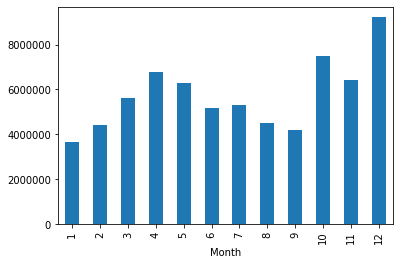

In [32]:
# Method 1: The Pandas Way(obviously, Matplotlib is getting called by Pandas here)
df.groupby('Month').Sales.sum().plot(kind = 'bar')

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x14e93932988>,
 <a list of 12 Text xticklabel objects>)

Text(0, 0.5, 'Sales in USD($)')

Text(0.5, 0, 'Month Number')

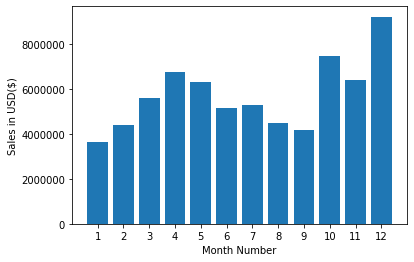

In [33]:
# Method 2: The Matplotlib Way( Let's write Matplot independently)
months = range(1,13)
plt.bar(months,df.groupby('Month').Sales.sum())
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

#### So, It's clear that the best month for sales was December.

## 2. Which City has highest number of Sales

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


**we don't have a city column here, but we do have address where city is mentioned** *Let's go grab it from there*

**Again, we could do it in a multiple way**

In [35]:
# Method 1
df['city'] = df['Purchase Address'].str.split(',').apply(lambda x: x[1])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [36]:
# Method 2
def get_city(address):
    return address.split(',')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles


In [37]:
# Let's just drop one of them
df.drop(columns = 'city', inplace = True)

###### ... But, then City only isn't clear enough, we need to consider the city Code as well. Which we could perform multiple ways.

In [38]:
# Method 1
%%time
df['City'] = df['Purchase Address'].str.split(',').apply(lambda x: x[1]+ " "+x[2])

UsageError: Line magic function `%%time` not found.


In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [40]:
%%time
# Method 2
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x)+" "+get_state(x))

Wall time: 368 ms


In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


###### I could still see some issues here, the Zip code is also getting added, which i don't want

In [42]:
df['Purchase Address'].str.split(',')[3]

['669 Spruce St', ' Los Angeles', ' CA 90001']

In [43]:
%%time
# Method 1
df['City'] = df['Purchase Address'].str.split(',').apply(lambda x: x[1]+ " ("+x[2].split(" ")[1]+")")
df.head()

Wall time: 783 ms


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [44]:
%%time
# Method 2
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x)+" ("+get_state(x)+")")

df.head()

Wall time: 447 ms


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [45]:
%%time
# Method 2(with f-string)
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f" {get_city(x)} {get_state(x)}")

df.head()

Wall time: 431 ms


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [46]:
# Let's check the city with highest number of sales
df.groupby('City').Sales.sum()

City
  Atlanta GA          5.590997e+06
  Austin TX           3.639164e+06
  Boston MA           7.323284e+06
  Dallas TX           5.535951e+06
  Los Angeles CA      1.090514e+07
  New York City NY    9.328635e+06
  Portland ME         8.995165e+05
  Portland OR         3.741465e+06
  San Francisco CA    1.652441e+07
  Seattle WA          5.495511e+06
Name: Sales, dtype: float64

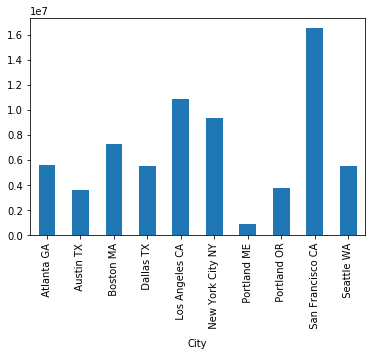

In [47]:
# Let's plot the data we got: >>>Pandas Way(METHOD 1)<<<

df.groupby('City').Sales.sum().plot(kind = 'bar')

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x14e937a8848>,
 <a list of 10 Text xticklabel objects>)

Text(0, 0.5, 'Sales in USD($)')

Text(0.5, 0, 'City')

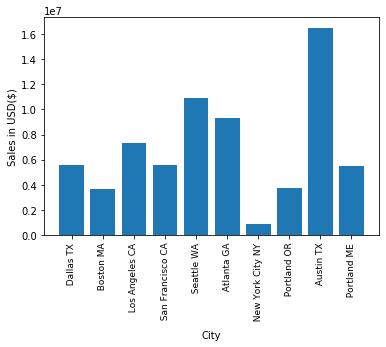

In [48]:
# Method 2: The Matplotlib Way
city = df.City.unique()
plt.bar(city,df.groupby('City').Sales.sum())
plt.xticks(city, rotation ='vertical', size = 9)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()

**OOPS!!! Rather than 'San Francisco', it is showing Austin as the best city which is obviously wrong; Let's examine what went wrong here**

###### Now, what went wrong here for us, pandas is giving us the correct bar plot but the matplotlib isn't. why is that? Let's examine it here.

**Essentially, Pandas calls numpy as well as Matplotlib internally, so that's why the grouped data gets passed to the matplot lib in the first method, but when in the second method when we're trying to work with Matplotlib directly here, we need to provide the groupby value as it doesn't know it internally as Pandas**

In [49]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.6.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 45.2.0.post20200210
Cython           : 0.29.15
pytest           : 5.3.5
hypothesis       : 5.4.1
sphinx           : 2.4.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.7
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.12.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.1
fastparquet      : None
gcsfs            : None
lxml.etree       :

### You might be able to see both "Numpy" and "Matplotlib" along with all the other libraries integrated in Pandas

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x14e9371dc48>,
 <a list of 10 Text xticklabel objects>)

Text(0, 0.5, 'Sales in USD($)')

Text(0.5, 0, 'City')

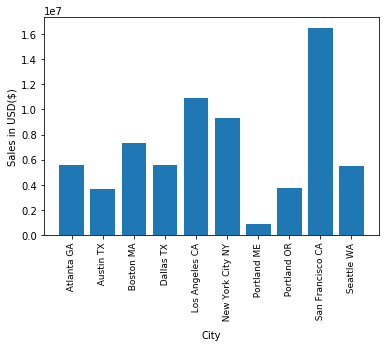

In [50]:
# Method 2: The Matplotlib Way(the correct way)
keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby('City').Sales.sum())
plt.xticks(keys, rotation ='vertical', size = 9)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()

###### Now, It makes a lot of sense to the analysis

## 3. When should we display the advertisements to maximize the likelihood of customers buying the product

In [51]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [52]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Hour'] = df['Order Date'].dt.hour
df['Order Minute'] = df['Order Date'].dt.minute

In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E9C045E88>],
      dtype=object)

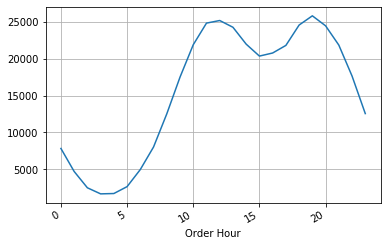

In [54]:
# Method: 1 (Pandas Way)
df.groupby('Order Hour').Sales.count().plot(kind = 'line', grid = True, subplots=True)

([<matplotlib.axis.XTick at 0x14e9c0e6588>,
 <a list of 24 Text xticklabel objects>)

Text(0.5, 0, 'Hours')

Text(0, 0.5, 'Number of Counts')

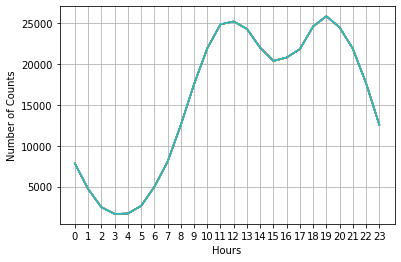

In [55]:
# Method: 2 (Matplotlib Way)
hours = [hour for hour, data in df.groupby('Order Hour')]
plt.plot(hours ,df.groupby('Order Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Counts')
plt.show()

#### Ok, So our peak is at around 11 am and 7pm

## 4. What products are most ofter sold together

In [56]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [179]:
df_dup.to_csv('mostOftenSoldProducts.csv', index = False)

### .transform() ALERT!!! 

**.transform() works the same as .apply() in application but the difference is that .transform() can be applied on series while .apply() is applicable to dataframe.**

**PS** *- I feel that .transform() is not that well documented, I don't generally use it myself but just for the idea of doing things the muliple ways excites me.*
___

In [173]:
f = list(df_dup['Order ID'].drop_duplicates())

In [174]:
len(f)

178437

In [177]:
i

'176558'

In [ ]:
g = []
for i in df_dup.index:
    if df['Order ID'][i] == df['Order ID'][i+1]:
        (df_dup['Product'][i] + df_dup['Product'][i+1])

In [170]:
%%time
e = df_dup.groupby(['Order ID'])['Product'].progress_apply(','.join).reset_index()


Wall time: 15 s


In [162]:
e.head()

,Order ID,Product
0,141234,"iPhone,iPhone"
1,141235,"Lightning Charging Cable,Lightning Charging Cable"
2,141236,"Wired Headphones,Wired Headphones"
3,141237,"27in FHD Monitor,27in FHD Monitor"
4,141238,"Wired Headphones,Wired Headphones"


In [164]:
e[e['Order ID'] == '176560']

,Order ID,Product
35326,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."


In [172]:
%%time
df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].progress_transform(','.join)
df_dup.head()


Wall time: 50.1 s


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute,Grouped,g
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,"USB-C Charging Cable,USB-C Charging Cable",NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,"Bose SoundSport Headphones,Bose SoundSport Hea...",NaN
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones,Google Phone,Wir...",NaN
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones,Google Phone,Wir...",NaN
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,"Wired Headphones,Wired Headphones",NaN


In [59]:
type(df_dup['Grouped'])

pandas.core.series.Series

**Wall time: Wall time: 43.9 s** *Have a look at time taken by .transform() here, I think you got the idea.*

### Getting back to our bread and butter - .apply()

In [77]:
#####>>>>>Apply Method
#%%time
df_dup['g'] = df_dup.groupby('Order ID').apply(lambda x: list(x['Product']))
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute,Grouped,g
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,NaN,NaN
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,NaN,NaN
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,NaN,NaN
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,NaN,NaN


In [159]:
df_dup['Order ID'].value_counts().sort_values(ascending = False)

160873    10
194253     8
193511     8
277875     8
235798     8
          ..
213753     2
241558     2
302928     2
185284     2
226478     2
Name: Order ID, Length: 178437, dtype: int64

#### Let's Select the necessary features that we need

In [205]:
df_sel = df_dup[['Order ID','Grouped']].drop_duplicates()
df_sel.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones"
6,176562,"USB-C Charging Cable,USB-C Charging Cable"


In [206]:
def compare(n):
    if df_sel.Grouped.str.split(',')[n][0]==df_sel.Grouped.str.split(',')[n][1]:
        print(True)
    else:
        print(False)
    

In [207]:
#we could an issue here, same items are there in our combined column
df_sel['loo'] =df_sel.apply(lambda x: compare(x))
    

False
False


In [208]:
df_sel.head()

,Order ID,Grouped,loo
0,176558,"USB-C Charging Cable,USB-C Charging Cable",NaN
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea...",NaN
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir...",NaN
5,176561,"Wired Headphones,Wired Headphones",NaN
6,176562,"USB-C Charging Cable,USB-C Charging Cable",NaN


In [153]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df_sel['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)   

Counter({('USB-C Charging Cable', 'USB-C Charging Cable'): 22095, ('Lightning Charging Cable', 'Lightning Charging Cable'): 21874, ('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 20833, ('AA Batteries (4-pack)', 'AA Batteries (4-pack)'): 20717, ('Wired Headphones', 'Wired Headphones'): 19022, ('Apple Airpods Headphones', 'Apple Airpods Headphones'): 15645, ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 13433, ('27in FHD Monitor', '27in FHD Monitor'): 7543, ('iPhone', 'iPhone'): 6850, ('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'): 6250, ('34in Ultrawide Monitor', '34in Ultrawide Monitor'): 6209, ('Google Phone', 'Google Phone'): 5537, ('Flatscreen TV', 'Flatscreen TV'): 4824, ('Macbook Pro Laptop', 'Macbook Pro Laptop'): 4736, ('ThinkPad Laptop', 'ThinkPad Laptop'): 4136, ('20in Monitor', '20in Monitor'): 4113, ('iPhone', 'Lightning Charging Cable'): 3025, ('Google Phone', 'USB-C Charging Cable'): 2973, ('Vareebadd Phone', 'Vareebadd Phone'): 2065, ('iPhone',

In [154]:
count.most_common(10)

[(('USB-C Charging Cable', 'USB-C Charging Cable'), 22095),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 21874),
 (('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 20833),
 (('AA Batteries (4-pack)', 'AA Batteries (4-pack)'), 20717),
 (('Wired Headphones', 'Wired Headphones'), 19022),
 (('Apple Airpods Headphones', 'Apple Airpods Headphones'), 15645),
 (('Bose SoundSport Headphones', 'Bose SoundSport Headphones'), 13433),
 (('27in FHD Monitor', '27in FHD Monitor'), 7543),
 (('iPhone', 'iPhone'), 6850),
 (('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'), 6250)]

In [124]:
for key, value in count.most_common(10):
    print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


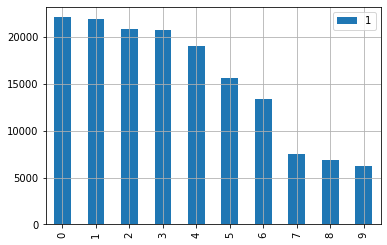

In [135]:
selected_10 = count.most_common(10)
pd.DataFrame(selected_10).plot(kind = 'bar',grid = True, use_index = False)

## 5. 

In [148]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


### 6. What product sold the most? why do you think it is sold the most?

In [ ]:
df.head(3)

In [145]:
product_grp = df.groupby('Product')
quantity_ordered = product_grp.sum()['Quantity Ordered']

<BarContainer object of 19 artists>

Text(0, 0.5, 'Quantity Ordered')

Text(0.5, 0, 'Products')

([<matplotlib.axis.XTick at 0x2990d678248>,
 <a list of 19 Text xticklabel objects>)

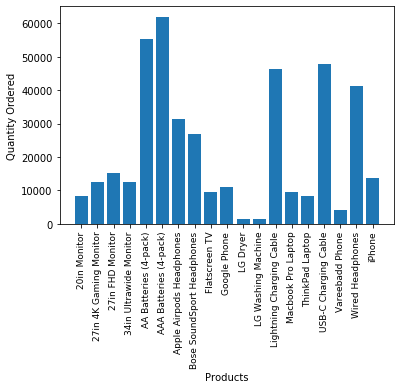

In [137]:
# Method_1: (Matplotlib way)
products = [product for product, df in product_grp]

plt.bar(products, quantity_ordered)

plt.ylabel('Quantity Ordered')
plt.xlabel('Products')

plt.xticks(products, rotation = 'vertical', size = 9)
plt.show()

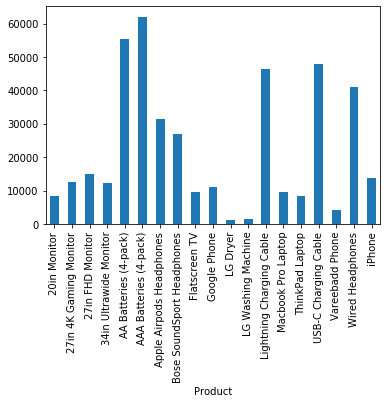

In [146]:
# Method_2: Pandas Way
quantity_ordered_pandas = product_grp.sum()['Quantity Ordered'].plot(kind = 'bar')

### The graph doesn't look good enough and we can't draw any meaning why a product is getting sold more than the other

In [141]:
prices = df.groupby('Product').mean()['Price Each']
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

<BarContainer object of 19 artists>

Text(0.5, 0, 'Product Name')

Text(0, 0.5, 'Quanity Ordered')

Text(0, 0.5, 'Price ($)')

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

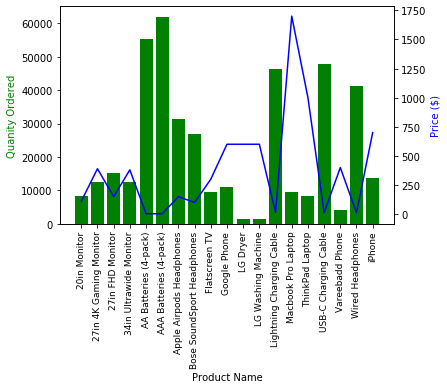

In [147]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quanity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation = 'vertical', size = 9)
plt.show()

### Here we could notice that the product whose price is low is sold more often compared to higher price items.